In [1]:
import os
import sys
cwd = os.getcwd()
project_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(project_dir)

In [2]:
import pandas as pd
from src.audio_util import *
import matplotlib.pyplot as plt
from IPython.display import Audio
from tqdm import tqdm

# EDA

## EDA for Labels

## EDA for Audio

### Explore one sample

In [3]:
AUDIO_FILE = '../data/mtat/6/barry_phillips-trad-01-polska_fran_glava-0-29.mp3'
Audio(AUDIO_FILE)

In [4]:
aud = AudioUtil.open(AUDIO_FILE) # returns tuple with signal and sampling_rate
signal, sampling_rate = aud # tuple unpacking
print(signal)
print(sampling_rate)

print(signal)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  5.0180e-07,
          4.0273e-07, -4.4547e-07]])
16000
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  5.0180e-07,
          4.0273e-07, -4.4547e-07]])


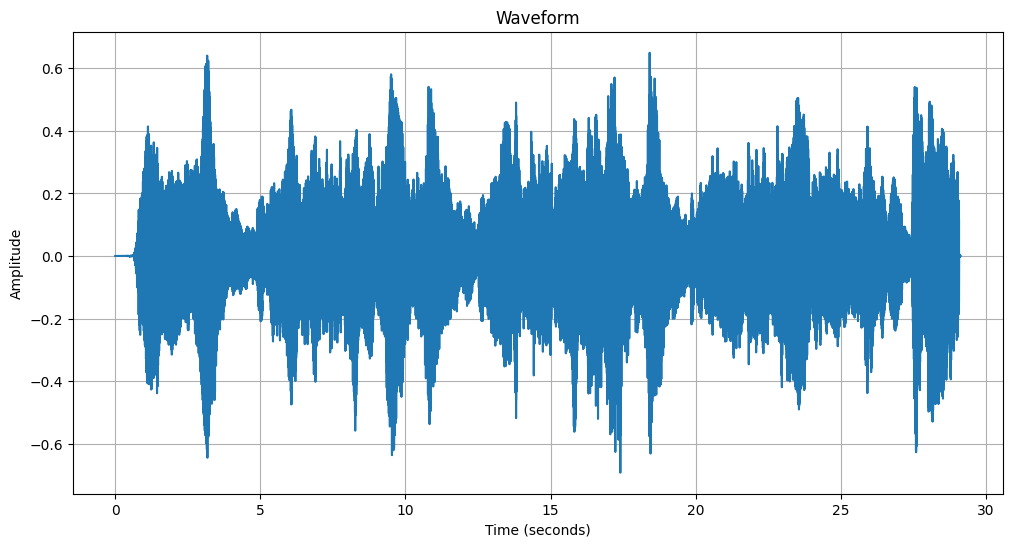

In [5]:
AudioPlot.plot_waveform(signal, sampling_rate)

In [6]:
# Get number of channels
num_channels = AudioUtil.get_audio_channels(aud)
print(f'Number of channels: {num_channels}')

Number of channels: 1


In [7]:
# Get the duration of the audio file
duration = AudioUtil.get_audio_duration(aud)
print(f'Duration of audio: {duration}')

Duration of audio: 29.124


In [8]:
spec = torch.stft(signal, n_fft=2024, return_complex=True)
print(spec)

tensor([[[ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          -1.5948e-07+0.0000e+00j,  ...,
           2.6052e+00+0.0000e+00j,  2.1687e+00+0.0000e+00j,
           2.8488e-01+0.0000e+00j],
         [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          -1.6068e-07+3.3746e-09j,  ...,
          -6.1531e-01-4.8276e-02j,  1.1077e-01-1.2269e+00j,
          -1.1345e-01-6.3474e-01j],
         [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          -1.6407e-07+5.9333e-09j,  ...,
           5.3848e-01-3.9259e-01j,  9.9150e-02+1.2995e-01j,
          -6.9027e-01-5.9723e-01j],
         ...,
         [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          -1.6679e-09-1.1639e-11j,  ...,
           4.9880e-02-2.0714e-04j, -7.2018e-02+2.7977e-04j,
           5.8126e-02-1.5259e-04j],
         [ 0.0000e+00+0.0000e+00j,  0.0000e+00+0.0000e+00j,
          -1.6682e-09-5.7199e-12j,  ...,
           4.9861e-02-5.1767e-05j, -7.1946e-02+1.2672e-04j,
           5.8094e-02-1.0490e-04j],
 

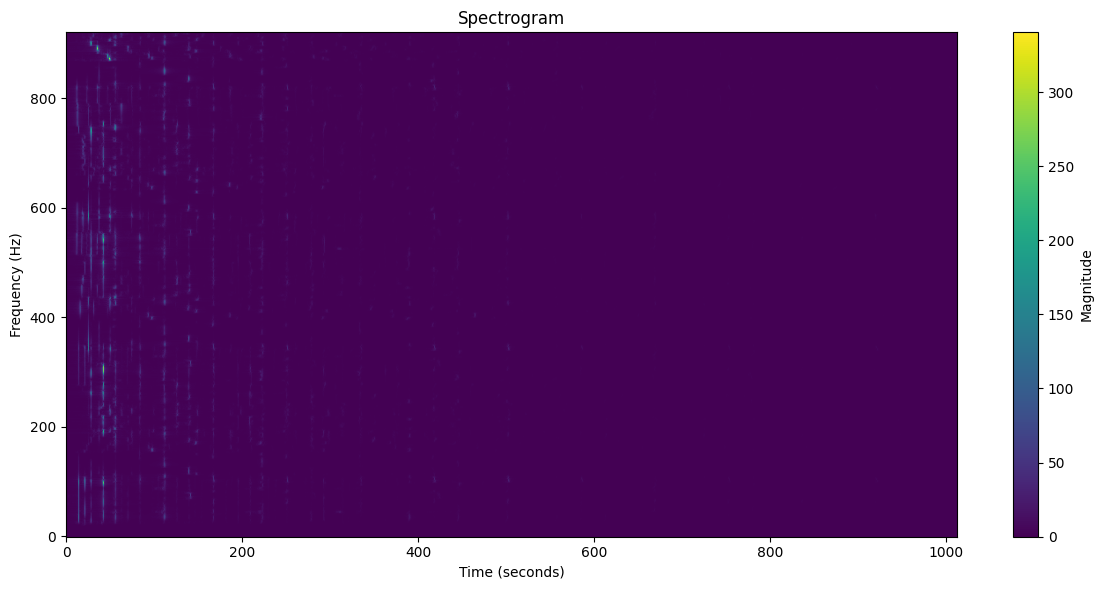

In [9]:
AudioPlot.plot_spectrogram(spec, sampling_rate)

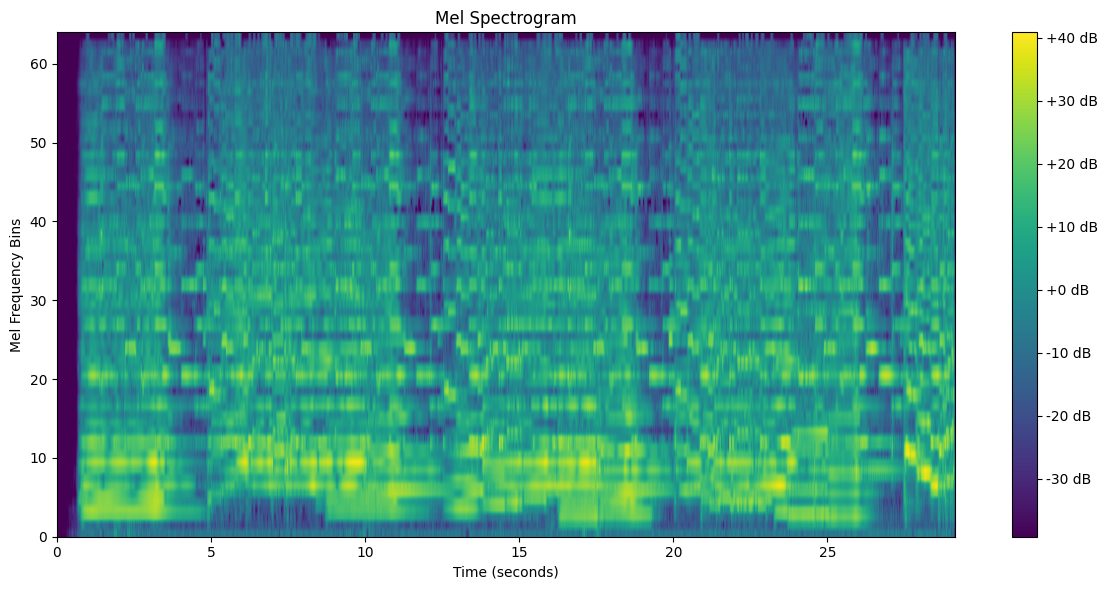

In [10]:
mel_spec = AudioUtil.mel_spectrogram_with_db(aud)
AudioPlot.plot_mel_spectrogram(mel_spec, sampling_rate)

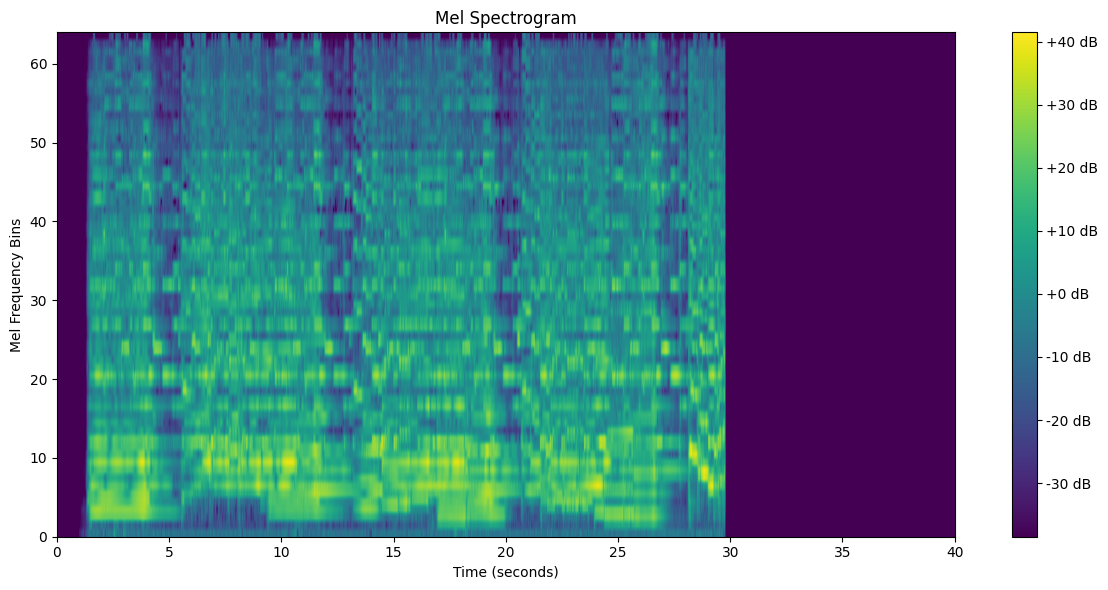

In [11]:
# Fixing time by padding / truncating
fixed_time_aud = AudioUtil.fix_audio_length(aud, max_s=40)
mel_spec_fixed = AudioUtil.mel_spectrogram_with_db(fixed_time_aud)
AudioPlot.plot_mel_spectrogram(mel_spec_fixed, sampling_rate)

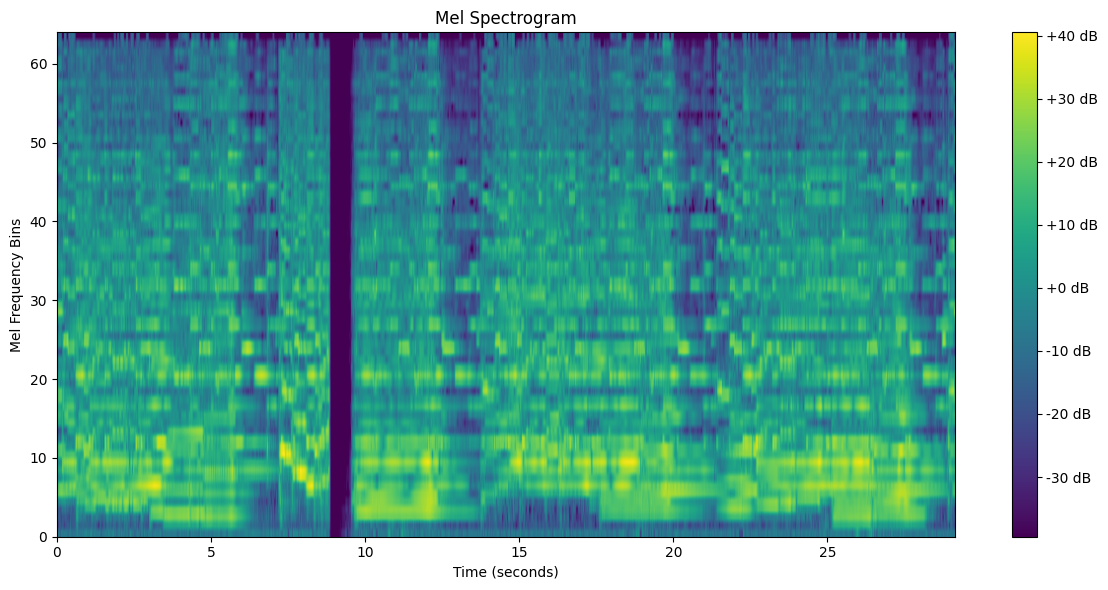

In [12]:
# Time shifting
shifted_aud = AudioAugment.time_shift(aud, shift_limit=0.4)
mel_spec_time_shift_fixed_dur = AudioUtil.mel_spectrogram_with_db(shifted_aud)
AudioPlot.plot_mel_spectrogram(mel_spec_time_shift_fixed_dur, sampling_rate)

### Iterate over mtat data

In [13]:
# function to iterate over given dataframe (mtat or gtzan) to extract metadata and problematic files
def create_metadata_dataframe(df, data_path):
    label_df = df
    # Iterate over the filepaths in the subset DataFrame
    for file in tqdm(label_df['filepath'], desc='Processing audio files'):
        metadata = []
        error_files = []  # List to store paths of problematic files

        try:
            # Construct the full file path for the audio file
            full_path = data_path + file
            # Use your AudioUtil class to open the audio file
            audio = AudioUtil.open(full_path)
            signal, sampling_rate = audio
            num_channels = AudioUtil.get_audio_channels(audio)
            audio_length = AudioUtil.get_audio_duration(audio)

            # Create a dictionary of the data you want to store
            audio_info = {
                'filepath': file,
                'audio_channels': num_channels,
                'sampling_rate': sampling_rate,
                'audio_length': audio_length,
                #TODO more features
            }

            # Append the dictionary to your list
            metadata.append(audio_info)

        except Exception as e:
            print(f"Failed to process {file}: {e}")
            error_files.append({'filepath': file, 'error': str(e)})

    # Convert the list of dictionaries to a new DataFrame
    metadata_df = pd.DataFrame(metadata)
    error_df = pd.DataFrame(error_files)

    return metadata_df, error_df


In [14]:
mtat = pd.read_csv('../data/mtat_label.csv', index_col=0)

In [15]:
mtat.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...


In [16]:
# get metadata and error df
metadata_mtat, errors_mtat = create_metadata_dataframe(mtat, '../data/')

Processing audio files:  63%|██████▎   | 16262/25863 [1:58:24<03:14, 49.47it/s]     

Failed to process mtat/6/norine_braun-now_and_zen-08-gently-117-146.mp3: Failed to open the input "../data/mtat/6/norine_braun-now_and_zen-08-gently-117-146.mp3" (Invalid argument).


Processing audio files:  96%|█████████▌| 24878/25863 [2:00:39<00:14, 67.84it/s]

Failed to process mtat/8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3: Failed to open the input "../data/mtat/8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3" (Invalid argument).


Processing audio files:  99%|█████████▉| 25559/25863 [2:00:49<00:04, 70.42it/s]

Failed to process mtat/9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3: Failed to open the input "../data/mtat/9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3" (Invalid argument).


Processing audio files: 100%|██████████| 25863/25863 [2:00:54<00:00,  3.57it/s]


In [17]:
# delete those from the label data
error_file_set = set(errors_mtat['filepath'])
label = label[~label['filepath'].isin(error_file_set)]

KeyError: 'filepath'

In [ ]:
# Print results
for col in metadata_mtat.columns.to_list():
    if col == 'filepath':
        continue
    print(metadata_mtat[col].value_counts())
    print()

### Iterate over Gtzan data

In [ ]:
gtzan = pd.read_csv('../data/gtzan_label.csv', index_col=0)

In [ ]:
metadata_gtzan, errors_gtzan = create_metadata_dataframe(gtzan, '../data/')

In [ ]:
# Print results
for col in metadata_gtzan.columns.to_list():
    if col == 'filepath':
        continue
    print(metadata_gtzan[col].value_counts())
    print()